In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import os
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('./data/train_final_features.csv')
data.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,...,28.763386,-108.306615,131.115603,42.530926,-14.726218,15.763673,-59.729539,-9.563379,-99.812542,57.643648
1,1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,...,117.588047,5.239809,56.622513,92.054120,141.063318,-30.466189,-25.418969,87.120100,-23.594520,7.936903
2,2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,...,128.699940,17.433408,58.203366,88.642932,-84.962777,71.462348,-10.853923,-59.501677,-99.425349,95.334779
3,3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,70.475245,-31.174270,86.080315,49.967737,25.750446,-27.612384,24.050796,-3.504149,-46.115803,56.242293
4,4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,...,18.852784,-70.416571,87.693603,38.386015,-14.003132,-12.975111,46.318839,-25.159628,-53.098675,-2.351913


In [3]:
data = data.sample(100000)

In [4]:
data.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
213639,213639,213639,1,0.666644,0.399992,0.749981,0.749981,0.714276,0.555549,1.0,...,69.059495,-13.268844,31.130439,5.981844,74.137426,32.663428,-100.995006,0.987829,-42.779421,24.161308
294895,294895,294895,1,0.999900,0.499975,0.499988,0.399992,0.599988,0.428565,1.0,...,70.111319,-10.945956,-19.215203,15.073357,-8.418751,22.232069,93.142708,-53.099205,-44.680416,20.692961
345746,345746,345746,1,0.624992,0.555549,0.799984,0.399996,0.562496,0.449998,0.0,...,76.996500,76.883956,111.487331,40.935277,0.619663,-38.279788,-53.099623,49.597832,-26.680559,-45.852834
12084,12084,12084,0,0.666644,0.499988,0.000000,0.000000,0.399992,0.249997,0.0,...,41.272827,9.121686,78.755582,0.205532,22.005424,15.872743,-41.153528,8.936385,-50.571617,-46.110709
39564,39564,39564,1,0.749981,0.599988,0.499992,0.428565,0.499996,0.461535,0.0,...,35.960579,45.841469,56.808757,104.850899,-76.195914,7.475324,10.750183,105.404040,-136.986353,20.690784


In [7]:
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)

In [8]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
213639,0.666644,0.399992,0.749981,0.749981,0.714276,0.555549,1.0,0.0,2.0,8.0,...,69.059495,-13.268844,31.130439,5.981844,74.137426,32.663428,-100.995006,0.987829,-42.779421,24.161308
294895,0.999900,0.499975,0.499988,0.399992,0.599988,0.428565,1.0,1.0,2.0,6.0,...,70.111319,-10.945956,-19.215203,15.073357,-8.418751,22.232069,93.142708,-53.099205,-44.680416,20.692961
345746,0.624992,0.555549,0.799984,0.399996,0.562496,0.449998,0.0,1.0,4.0,18.0,...,76.996500,76.883956,111.487331,40.935277,0.619663,-38.279788,-53.099623,49.597832,-26.680559,-45.852834
12084,0.666644,0.499988,0.000000,0.000000,0.399992,0.249997,0.0,0.0,3.0,6.5,...,41.272827,9.121686,78.755582,0.205532,22.005424,15.872743,-41.153528,8.936385,-50.571617,-46.110709
39564,0.749981,0.599988,0.499992,0.428565,0.499996,0.461535,0.0,0.0,1.0,12.5,...,35.960579,45.841469,56.808757,104.850899,-76.195914,7.475324,10.750183,105.404040,-136.986353,20.690784


<h2> 4.2 Converting strings to numerics </h2>

In [9]:
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

In [10]:
y_true = list(map(int, y_true.values))

In [11]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify = y_true, test_size = 0.3)

In [12]:
print(X_train.shape)
print(X_test.shape)

(70000, 218)
(30000, 218)


In [13]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20, 4))
    labels = [1,2]
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Log loss = 0.6581884294126104 for alpha = 1e-05
Log loss = 0.537229493475177 for alpha = 0.0001
Log loss = 0.5321151501055691 for alpha = 0.001
Log loss = 0.5388527747165445 for alpha = 0.01
Log loss = 0.5461377274235176 for alpha = 0.1
Log loss = 0.5326838761309495 for alpha = 1
Log loss = 0.5351213863615183 for alpha = 10


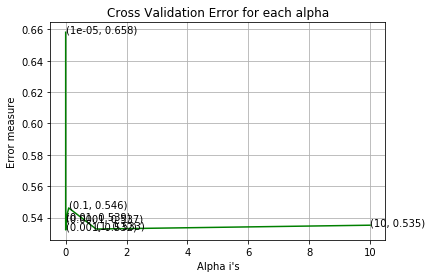

Training loss = 0.5348378016062121 for best alpha = 0.001
Test loss = 0.5321151501055691 for best alpha = 0.001


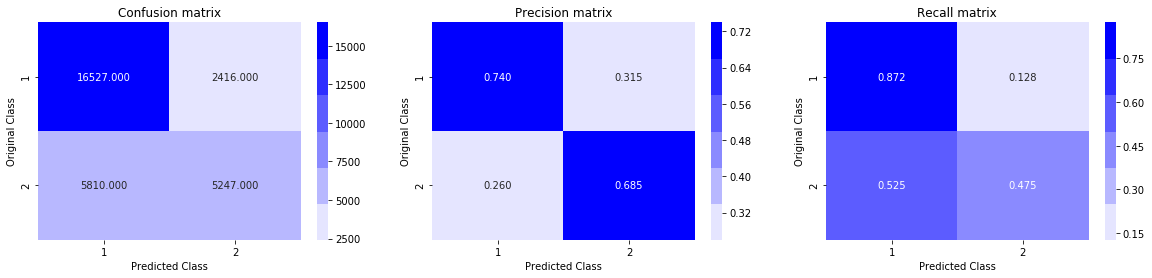

In [15]:
import warnings
warnings.filterwarnings("ignore")

alpha = [10 ** x for x in range(-5, 2)]
log_error_array = []

for i in alpha:
    clf = SGDClassifier(alpha = i, penalty = 'l2', loss = 'log', random_state = 42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method = "sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels = clf.classes_, eps = 1e-15))
    print('Log loss = {} for alpha = {}'.format(log_loss(y_test, predict_y, labels = clf.classes_, eps = 1e-15), i))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c = 'g')
for i, txt in enumerate(np.round(log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('Training loss = {} for best alpha = {}'.format(log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15), alpha[best_alpha]))
predict_y = sig_clf.predict_proba(X_test)
print('Test loss = {} for best alpha = {}'.format(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15), alpha[best_alpha]))
predicted_y =np.argmax(predict_y, axis = 1)
plot_confusion_matrix(y_test, predicted_y)

Log loss = 0.6581884294126104 for alpha = 1e-05
Log loss = 0.4887824988243809 for alpha = 0.0001
Log loss = 0.5120403220175289 for alpha = 0.001
Log loss = 0.5512131535724316 for alpha = 0.01
Log loss = 0.603156074906537 for alpha = 0.1
Log loss = 0.6434270317721809 for alpha = 1
Log loss = 0.6581884294126104 for alpha = 10


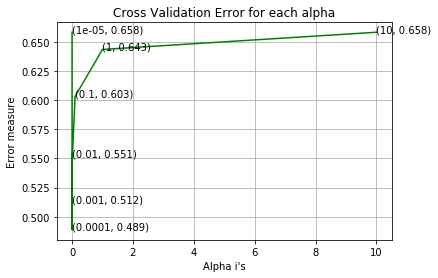

Training loss = 0.4891134454625962 for best alpha = 0.0001
Test loss = 0.4887824988243809 for best alpha = 0.0001


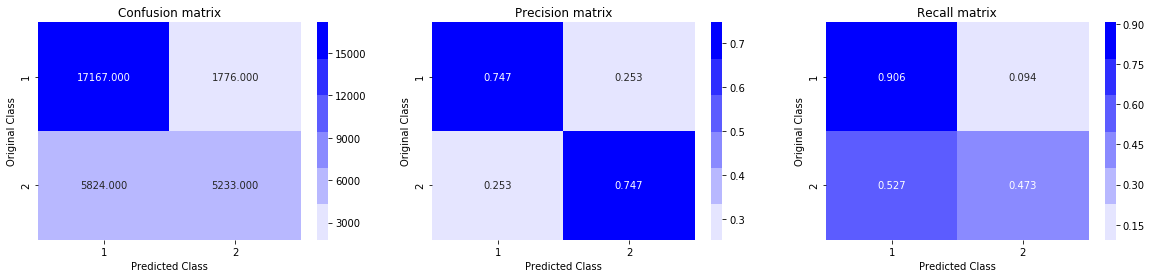

In [16]:
alpha = [10 ** x for x in range(-5, 2)] 
log_error_array = []

for i in alpha:
    clf = SGDClassifier(alpha = i, penalty = 'l1', loss = 'hinge', random_state = 42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method = "sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('Log loss = {} for alpha = {}'.format(log_loss(y_test, predict_y, labels = clf.classes_, eps = 1e-15), i))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c = 'g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty = 'l1', loss = 'hinge', random_state = 42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method = "sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('Training loss = {} for best alpha = {}'.format(log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15), alpha[best_alpha]))
predict_y = sig_clf.predict_proba(X_test)
print('Test loss = {} for best alpha = {}'.format(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15), alpha[best_alpha]))
predicted_y =np.argmax(predict_y, axis = 1)
plot_confusion_matrix(y_test, predicted_y)